# SUOX


Sulfite Oxidase Deficiency

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [1]:
import genophenocorr
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopacket_folder
from genophenocorr.preprocessing import UniprotProteinMetadataService, VVTranscriptCoordinateService
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration
from genophenocorr.model import VariantEffect
from genophenocorr.model.genome import GRCh38
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.view import CohortViewable, ProteinVisualizable, ProteinVisualizer
from IPython.display import HTML, display
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

/Users/robin/PycharmProjects/genophenocorr/gpc_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Loaded HPO v2024-04-26
Using genophenocorr version 0.1.1dev


### Setup

In [2]:
fpath_phenopackets = 'phenopackets'
SUOX_transcript_id = 'NM_001032386.2'
SUOX_protein_id = "NP_001027558.1"

### Load Phenopackets

In [3]:
cohort_creator = configure_caching_cohort_creator(hpo)
cohort = load_phenopacket_folder(fpath_phenopackets, cohort_creator)
viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=SUOX_transcript_id)))

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 1197.27it/s]
Validated under none policy
No errors or warnings were found


HPO Term,ID,Annotation Count
Seizure,HP:0001250,28
Hypotonia,HP:0001252,15
Sulfocysteinuria,HP:0032350,13
Abnormality of extrapyramidal motor function,HP:0002071,11
Hypertonia,HP:0001276,11
Hypohomocysteinemia,HP:0020222,10
Microcephaly,HP:0000252,10
Neurodevelopmental delay,HP:0012758,8
Ectopia lentis,HP:0001083,7
Hypocystinemia,HP:0500152,7


In [4]:

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(SUOX_transcript_id)
protein_id = 'NP_037407.4' 
from genophenocorr.preprocessing import UniprotProteinMetadataService
pms = UniprotProteinMetadataService()
protein_metas = pms.annotate(SUOX_protein_id)

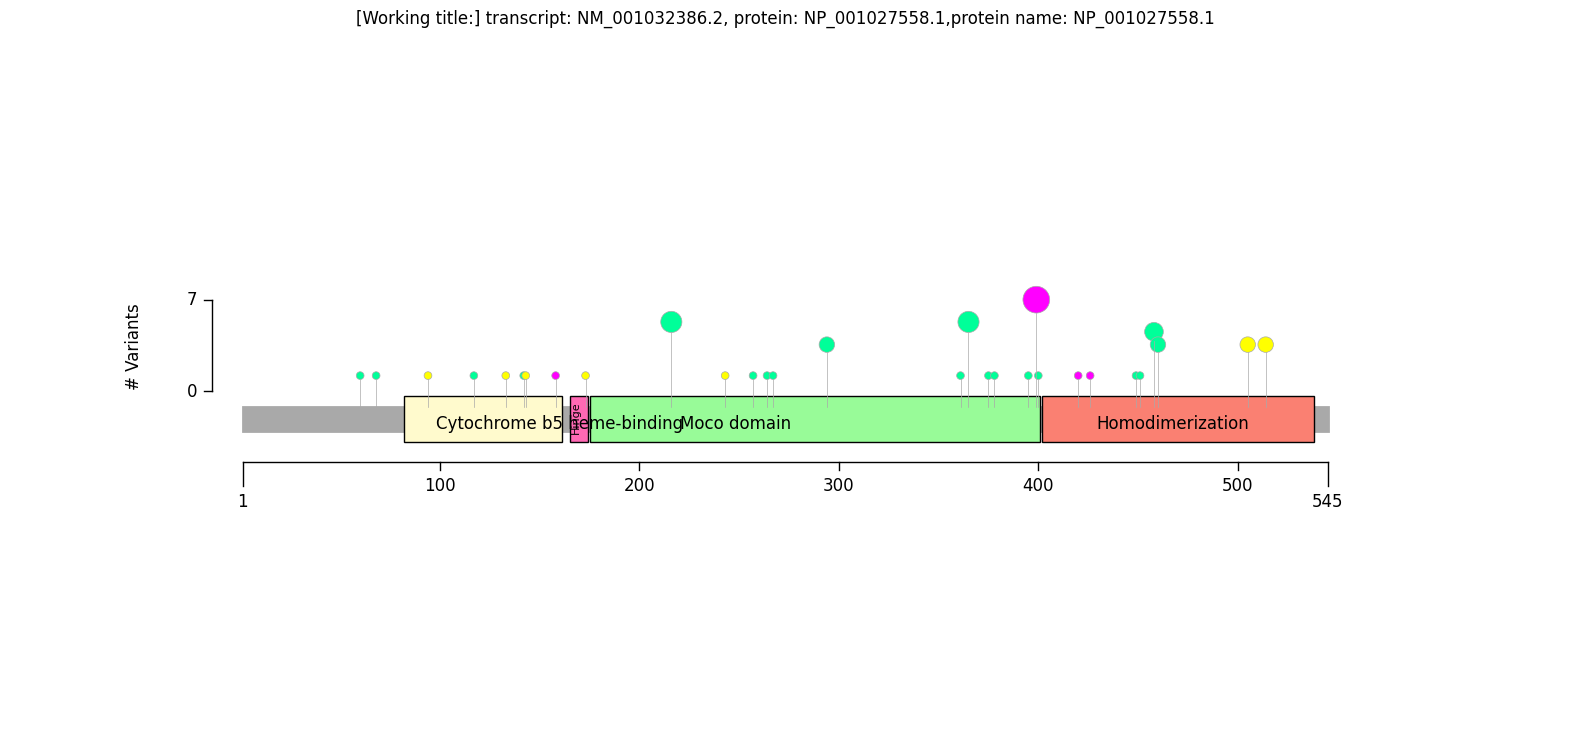

In [5]:
protein_meta = protein_metas[0]
pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Genotype Phenotype Correlation Analysis analysis

In [6]:

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
analysis_config.min_perc_patients_w_hpo = 0.1
analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run the analyses

Compare missense variants vs. other variants.

In [7]:
missense = analysis.compare_by_variant_effect(VariantEffect.MISSENSE_VARIANT, SUOX_transcript_id)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_001032386.2                    Yes             No  \
                                                    Count Percent  Count   
Seizure [HP:0001250]                                17/24     71%  11/11   
Cognitive regression [HP:0034332]                    6/17     35%    0/8   
Hypotonia [HP:0001252]                              12/16     75%    3/7   
Abnormality of extrapyramidal motor function [H...   9/17     53%    2/8   
Neurodevelopmental delay [HP:0012758]                4/17     24%    4/8   
Microcephaly [HP:0000252]                            6/14     43%    4/7   
Hypertonia [HP:0001276]                              7/16     44%    4/7   
Ectopia lentis [HP:0001083]                          6/15     40%    1/3   
Xanthinuria [HP:0010934]                              2/9     22%    0/2   

MISSENSE_VARIANT on NM_001032386.2                                    \
                                                   Percent   p value   
Seizure [HP:0001250]                                  100%  0.072129   
Cognitive regression [HP:0034332]                       0%  0.129170   
Hypotonia [HP:0001252]                                 43%  0.181896   
Abnormality of extrapyramidal motor function [H...     25%  0.233684   
Neurodevelopmental delay [HP:0012758]                  50%  0.359216   
Microcephaly [HP:0000252]                              57%  0.659443   
Hypertonia [HP:0001276]                                57%  0.666846   
Ectopia lentis [HP:0001083]                            33%  1.000000   
Xanthinuria [HP:0010934]                                0%  1.000000   

MISSENSE_VARIANT on NM_001032386.2                                    
                                                   Corrected p value  
Seizure [HP:0001250]                                        0.525789  
Cognitive regression [HP:0034332]                           0.525789  
Hypotonia [HP:0001252]                                      0.525789  
Abnormality of extrapyramidal motor function [H...          0.525789  
Neurodevelopmental delay [HP:0012758]                       0.646589  
Microcephaly [HP:0000252]                                   0.857374  
Hypertonia [HP:0001276]                                     0.857374  
Ectopia lentis [HP:0001083]                                 1.000000  
Xanthinuria [HP:0010934]                                    1.000000

Test for presence of genotype-phenotype correlations between subjects with >=1 allele of a variant vs. the others.

In [8]:
by_variant = analysis.compare_by_variant_key('12_56004589_56004589_C_G')
by_variant.summarize(hpo, PatientCategories.YES)

>=1 allele of the variant 12_56004589_56004589_C_G   Yes             No  \
                                                   Count Percent  Count   
Hypotonia [HP:0001252]                               1/5     20%  14/18   
Neurodevelopmental delay [HP:0012758]                0/6      0%   8/19   
Abnormality of extrapyramidal motor function [H...   1/6     17%  10/19   
Cognitive regression [HP:0034332]                    0/6      0%   6/19   
Ectopia lentis [HP:0001083]                          2/3     67%   5/15   
Seizure [HP:0001250]                                 6/7     86%  22/28   
Hypertonia [HP:0001276]                              2/5     40%   9/18   
Microcephaly [HP:0000252]                            2/4     50%   8/17   
Decreased urinary urate [HP:0011935]                 0/1      0%    2/6   
Abnormality of urinary uric acid level [HP:0012...   0/1      0%    2/6   
Xanthinuria [HP:0010934]                             0/1      0%   2/10   

>=1 allele of the variant 12_56004589_56004589_C_G                    \
                                                   Percent   p value   
Hypotonia [HP:0001252]                                 78%  0.032869   
Neurodevelopmental delay [HP:0012758]                  42%  0.129170   
Abnormality of extrapyramidal motor function [H...     53%  0.180435   
Cognitive regression [HP:0034332]                      32%  0.277764   
Ectopia lentis [HP:0001083]                            33%  0.528186   
Seizure [HP:0001250]                                   79%  1.000000   
Hypertonia [HP:0001276]                                50%  1.000000   
Microcephaly [HP:0000252]                              47%  1.000000   
Decreased urinary urate [HP:0011935]                   33%  1.000000   
Abnormality of urinary uric acid level [HP:0012...     33%  1.000000   
Xanthinuria [HP:0010934]                               20%  1.000000   

>=1 allele of the variant 12_56004589_56004589_C_G                    
                                                   Corrected p value  
Hypotonia [HP:0001252]                                      0.361556  
Neurodevelopmental delay [HP:0012758]                       0.661594  
Abnormality of extrapyramidal motor function [H...          0.661594  
Cognitive regression [HP:0034332]                           0.763851  
Ectopia lentis [HP:0001083]                                 1.000000  
Seizure [HP:0001250]                                        1.000000  
Hypertonia [HP:0001276]                                     1.000000  
Microcephaly [HP:0000252]                                   1.000000  
Decreased urinary urate [HP:0011935]                        1.000000  
Abnormality of urinary uric acid level [HP:0012...          1.000000  
Xanthinuria [HP:0010934]                                    1.000000

TODO - finalize!